In [1]:
import pandas as pd
import torch
import sys
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
from torch.utils.data import random_split

sys.path.append("../../../")
from src.ae_architectures.lstm.autoencoder import LSTMAutoEncoder
from src.dataset import ExerciseDataset
from src.trainer import Trainer

In [2]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
generator = torch.manual_seed(0)

In [3]:
squat_dct_df = pd.read_csv("../../../data/dct/squat.csv")
squat_dct_df.head()

,rep,frame,x,y,z,joint_name,label
0,1,0,0.006386,0.263329,2.062893,nose,correct
1,1,1,0.018464,0.038602,-0.023428,nose,correct
2,1,2,0.010405,0.125355,-0.056878,nose,correct
3,1,3,0.010309,-0.002697,-0.005694,nose,correct
4,1,4,-0.035405,0.009693,-0.015210,nose,correct


In [4]:
squat_dct_dataset = ExerciseDataset(squat_dct_df, representation="dct")
dataset_length = len(squat_dct_dataset)

In [5]:
train_squat_dct_dataset, val_squat_dct_dataset = random_split(
    squat_dct_dataset,
    [int(0.80 * dataset_length), dataset_length - int(0.80 * dataset_length)],
    generator,
)

In [6]:
batch_size = 8

train_squat_dct_dl = DataLoader(
    train_squat_dct_dataset,
    batch_size=batch_size,
    shuffle=True,
)

val_squat_dct_dl = DataLoader(
    val_squat_dct_dataset,
    batch_size=batch_size,
    shuffle=True,
)

In [7]:
NUM_JOINTS = 15
SEQUENCE_LENGTH = 25

LATENT_SIZE = 256
NUM_LAYERS = 2
HIDDEN_SIZE = 256

In [8]:
dct_lstm_autoencoder = LSTMAutoEncoder(
    SEQUENCE_LENGTH, NUM_JOINTS * 3, HIDDEN_SIZE, LATENT_SIZE, NUM_LAYERS
)
loss_fn = torch.nn.MSELoss(reduction="sum")
lr = 0.002
optimizer = torch.optim.Adam(dct_lstm_autoencoder.parameters(), lr)

In [9]:
trainer = Trainer(
    dct_lstm_autoencoder,
    train_squat_dct_dl,
    val_squat_dct_dl,
    loss_fn,
    optimizer,
    device,
)
results = trainer.train_autoencoder(
    num_epochs=350, weights_path="../../../models/dct_lstm_autoencoder.pt"
)

  0%|          | 0/14 [00:00<?, ?it/s]

100%|██████████| 14/14 [00:00<00:00, 30.85it/s]

2024-04-09 22:53:59,492: INFO     Epoch 1/350: Train Loss: 4939.151275634766



100%|██████████| 14/14 [00:00<00:00, 34.57it/s]

2024-04-09 22:54:03,447: INFO     Epoch 11/350: Train Loss: 183.4034821987152



100%|██████████| 14/14 [00:00<00:00, 38.45it/s]

2024-04-09 22:54:07,247: INFO     Epoch 21/350: Train Loss: 157.8486523628235



100%|██████████| 14/14 [00:00<00:00, 35.56it/s]

2024-04-09 22:54:11,176: INFO     Epoch 31/350: Train Loss: 135.84116733074188



100%|██████████| 14/14 [00:00<00:00, 36.96it/s]

2024-04-09 22:54:14,925: INFO     Epoch 41/350: Train Loss: 114.31257337331772



100%|██████████| 14/14 [00:00<00:00, 35.70it/s]

2024-04-09 22:54:18,552: INFO     Epoch 51/350: Train Loss: 88.76324808597565



100%|██████████| 14/14 [00:00<00:00, 37.91it/s]

2024-04-09 22:54:22,305: INFO     Epoch 61/350: Train Loss: 61.364063024520874



100%|██████████| 14/14 [00:00<00:00, 31.93it/s]

2024-04-09 22:54:26,197: INFO     Epoch 71/350: Train Loss: 43.85315698385239



100%|██████████| 14/14 [00:00<00:00, 37.65it/s]

2024-04-09 22:54:30,030: INFO     Epoch 81/350: Train Loss: 42.7775881588459



100%|██████████| 14/14 [00:00<00:00, 33.41it/s]

2024-04-09 22:54:33,958: INFO     Epoch 91/350: Train Loss: 36.47845768928528



100%|██████████| 14/14 [00:00<00:00, 37.96it/s]

2024-04-09 22:54:38,020: INFO     Epoch 101/350: Train Loss: 27.74267703294754



100%|██████████| 14/14 [00:00<00:00, 39.49it/s]

2024-04-09 22:54:41,623: INFO     Epoch 111/350: Train Loss: 24.944350957870483



100%|██████████| 14/14 [00:00<00:00, 34.53it/s]

2024-04-09 22:54:45,393: INFO     Epoch 121/350: Train Loss: 18.50128062069416



100%|██████████| 14/14 [00:00<00:00, 37.77it/s]

2024-04-09 22:54:49,111: INFO     Epoch 131/350: Train Loss: 23.498282432556152



100%|██████████| 14/14 [00:00<00:00, 38.82it/s]

2024-04-09 22:54:52,821: INFO     Epoch 141/350: Train Loss: 18.198083132505417



100%|██████████| 14/14 [00:00<00:00, 38.97it/s]

2024-04-09 22:54:56,499: INFO     Epoch 151/350: Train Loss: 16.28074850142002



100%|██████████| 14/14 [00:00<00:00, 37.97it/s]

2024-04-09 22:55:00,138: INFO     Epoch 161/350: Train Loss: 12.857845708727837



100%|██████████| 14/14 [00:00<00:00, 33.41it/s]

2024-04-09 22:55:04,143: INFO     Epoch 171/350: Train Loss: 11.029404111206532



100%|██████████| 14/14 [00:00<00:00, 37.28it/s]

2024-04-09 22:55:08,239: INFO     Epoch 181/350: Train Loss: 40.444278568029404



100%|██████████| 14/14 [00:00<00:00, 35.69it/s]

2024-04-09 22:55:12,311: INFO     Epoch 191/350: Train Loss: 14.591439381241798



100%|██████████| 14/14 [00:00<00:00, 34.85it/s]

2024-04-09 22:55:17,009: INFO     Epoch 201/350: Train Loss: 8.592008702456951



100%|██████████| 14/14 [00:00<00:00, 35.63it/s]

2024-04-09 22:55:21,027: INFO     Epoch 211/350: Train Loss: 6.836890585720539



100%|██████████| 14/14 [00:00<00:00, 33.44it/s]

2024-04-09 22:55:25,178: INFO     Epoch 221/350: Train Loss: 7.567589089274406



100%|██████████| 14/14 [00:00<00:00, 27.81it/s]

2024-04-09 22:55:29,549: INFO     Epoch 231/350: Train Loss: 9.825267262756824



100%|██████████| 14/14 [00:00<00:00, 32.49it/s]

2024-04-09 22:55:33,754: INFO     Epoch 241/350: Train Loss: 9.35747453942895



100%|██████████| 14/14 [00:00<00:00, 34.94it/s]

2024-04-09 22:55:37,938: INFO     Epoch 251/350: Train Loss: 6.391957927495241



100%|██████████| 14/14 [00:00<00:00, 34.71it/s]

2024-04-09 22:55:42,112: INFO     Epoch 261/350: Train Loss: 5.7877171114087105



100%|██████████| 14/14 [00:00<00:00, 33.93it/s]

2024-04-09 22:55:46,125: INFO     Epoch 271/350: Train Loss: 4.992353953421116



100%|██████████| 14/14 [00:00<00:00, 34.91it/s]

2024-04-09 22:55:50,240: INFO     Epoch 281/350: Train Loss: 7.568838983774185



100%|██████████| 14/14 [00:00<00:00, 32.23it/s]

2024-04-09 22:55:54,456: INFO     Epoch 291/350: Train Loss: 58.61962056159973



100%|██████████| 14/14 [00:00<00:00, 32.00it/s]

2024-04-09 22:55:58,730: INFO     Epoch 301/350: Train Loss: 18.964714914560318



100%|██████████| 14/14 [00:00<00:00, 33.46it/s]

2024-04-09 22:56:02,823: INFO     Epoch 311/350: Train Loss: 5.968087937682867



100%|██████████| 14/14 [00:00<00:00, 36.54it/s]

2024-04-09 22:56:06,665: INFO     Epoch 321/350: Train Loss: 4.394982513040304



100%|██████████| 14/14 [00:00<00:00, 37.34it/s]

2024-04-09 22:56:10,589: INFO     Epoch 331/350: Train Loss: 4.857772000133991



100%|██████████| 14/14 [00:00<00:00, 31.45it/s]

2024-04-09 22:56:14,516: INFO     Epoch 341/350: Train Loss: 3.4883524030447006



100%|██████████| 14/14 [00:00<00:00, 35.25it/s]

2024-04-09 22:56:18,200: INFO     Best model saved in ../../../models/dct_lstm_autoencoder.pt


In [14]:
print(min([result["train_loss"] for result in results[10:]]))

3.244274752214551


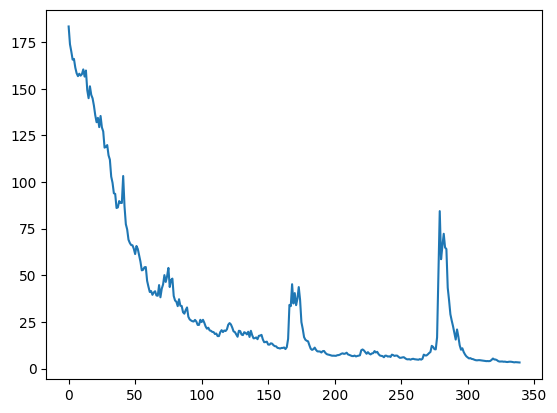

In [10]:
plt.plot([result["train_loss"] for result in results[10:]], label="train")

In [11]:
dct_lstm_autoencoder.load_state_dict(
    torch.load(
        "../../../models/dct_lstm_autoencoder.pt", map_location=torch.device("cpu")
    )
)

<All keys matched successfully>

Text(0.5, 1.0, 'decoded signal')

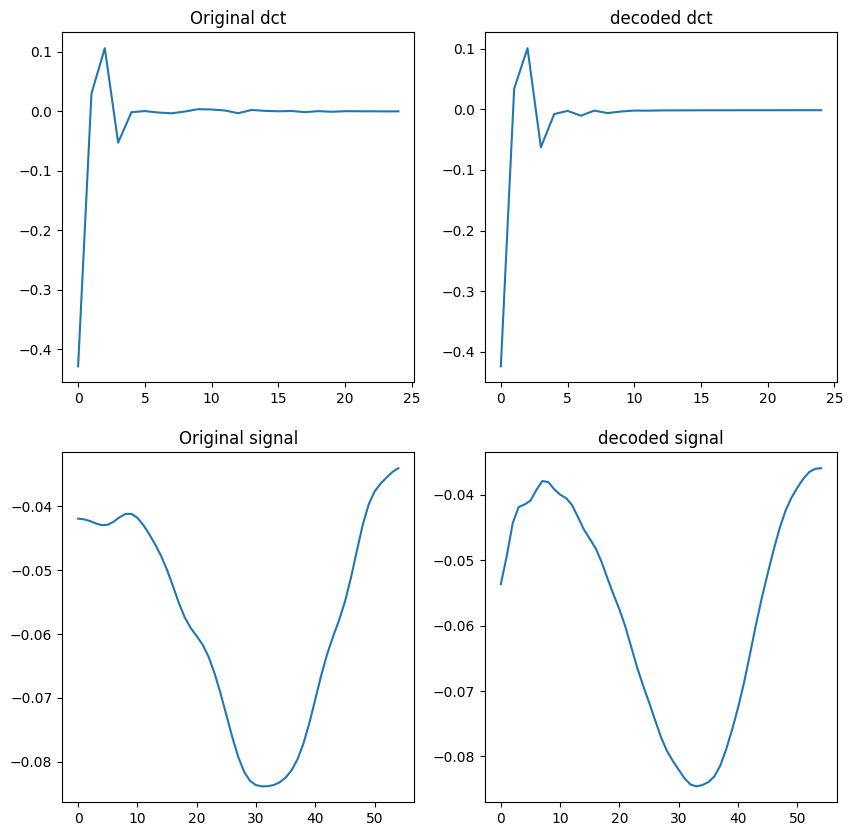

In [12]:
import numpy as np
from scipy.fft import idct

fig, axes = plt.subplots(2, 2, figsize=(10, 10))
dl_iter = iter(train_squat_dct_dl)
X, _ = next(dl_iter)
X = X[1].to(device).unsqueeze(0)
X_hat = dct_lstm_autoencoder(X)

axes[0][0].plot(X.squeeze().detach().numpy()[:, 30])
axes[0][0].set_title("Original dct")

original_signal = X.squeeze()[:, 30]
x_dct = np.zeros(55, dtype=float)
x_dct[:25] = original_signal
original_signal = idct(x_dct, norm="ortho")

axes[1][0].plot(original_signal)
axes[1][0].set_title("Original signal")

axes[0][1].plot(X_hat.squeeze().detach().numpy()[:, 30])
axes[0][1].set_title("decoded dct")

new_signal = X_hat.squeeze().detach().numpy()[:, 30]
x_dct = np.zeros(55, dtype=float)
x_dct[:25] = new_signal
new_signal = idct(x_dct, norm="ortho")

axes[1][1].plot(new_signal)
axes[1][1].set_title("decoded signal")

In [13]:
(X - X_hat).sum()

tensor(-0.0045, grad_fn=<SumBackward0>)